In [1]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
from configs import DatasetConfiguration
from utils_train import *
from configs import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import seaborn as sb
import deepdish as dd

seed = 42
np.random.seed(seed=seed)

splitting = 'custom'
data_setting = 'rawflt'
model_setting = 'dl4tsc_inc'

clean = True

### data collecting

In [2]:
mebios = DatasetConfiguration(names=['Suzukii_RL'])
mebios.select_all(); 
mebios.read();

Dataset - Suzukii_RL - exists: True


In [5]:
mebios.labels.value_counts()

L    21940
R    14348
dtype: int64

In [6]:
if clean:
    mebios.clean();
mebios.df.labels.value_counts()

L    16501
R    11457
Name: labels, dtype: int64

In [7]:
rodr_tr,rodr_ts = train_test_filenames2(dataset='Rodrigo',species='D. melanogaster', clean=False, plot=False, test_dates=['20200310','20200311','20200312', '20200313', '20200314', '20200315','20200316'])

Dataset - Rodrigo - exists: True
['20200309', '20200305', '20200302', '20200311', '20200310', '20200228', '20200307', '20200304', '20200301', '20200303', '20200306', '20200308', '20200229', '20200316', '20200315', '20200227', '20200313', '20200314', '20200312']
7145 train filenames, 1593 test filenames


In [9]:
rodr_tr,rodr_ts = train_test_filenames2(dataset='Rodrigo',species='D. melanogaster', clean=True, plot=False, test_dates=['20200310','20200311','20200312', '20200313', '20200314', '20200315','20200316'])

Dataset - Rodrigo - exists: True
['20200309', '20200305', '20200302', '20200311', '20200310', '20200228', '20200307', '20200304', '20200301', '20200303', '20200308', '20200229', '20200316', '20200315', '20200306', '20200227', '20200314', '20200313', '20200312']
3912 train filenames, 994 test filenames


In [10]:
rodsuz = DatasetConfiguration(names=['Rodrigo'])
rodsuz.select(name='Rodrigo', species=['D. suzukii'])
rodsuz.read()
rodsuz.labels.value_counts()

Dataset - Rodrigo - exists: True


D. suzukii    1098
dtype: int64

In [11]:
rodsuz.clean()
rodsuz.df.labels.value_counts()    

D. suzukii    866
Name: labels, dtype: int64

In [12]:
mebiosmelX = DatasetConfiguration(names=['Melanogaster_RL'])
mebiosmelX.select(name='Melanogaster_RL', species=['X'])
mebiosmelX.read()
mebiosmelX.labels.value_counts()

Dataset - Melanogaster_RL - exists: True


X    532
dtype: int64

In [13]:
mebiosmelX.clean()
mebiosmelX.df.labels = mebiosmelX.df.labels.apply(lambda x: x.replace("X", "D. melanogaster"))
mebiosmelX.df.labels.value_counts()

D. melanogaster    163
Name: labels, dtype: int64

In [14]:
mebiosmelW = DatasetConfiguration(names=['Melanogaster_RL'])
mebiosmelW.select(name='Melanogaster_RL', species=['W'])
mebiosmelW.read()
mebiosmelW.labels.value_counts()

Dataset - Melanogaster_RL - exists: True


W    1882
dtype: int64

In [15]:
mebiosmelW.clean()
mebiosmelW.df.labels = mebiosmelW.df.labels.apply(lambda x: x.replace("W", "D. melanogaster"))
mebiosmelW.df.labels.value_counts()

D. melanogaster    967
Name: labels, dtype: int64

In [25]:
mebiosL = DatasetConfiguration(names=['Suzukii_RL'])
mebiosL.select(name='Suzukii_RL', species=['L']); 
mebiosL.read();
mebiosL.clean();
mebiosL.parse_filenames()
mebiosR = DatasetConfiguration(names=['Suzukii_RL'])
mebiosR.select(name='Suzukii_RL', species=['R']); 
mebiosR.read();
mebiosR.clean();
mebiosR.parse_filenames()

Dataset - Suzukii_RL - exists: True
Dataset - Suzukii_RL - exists: True


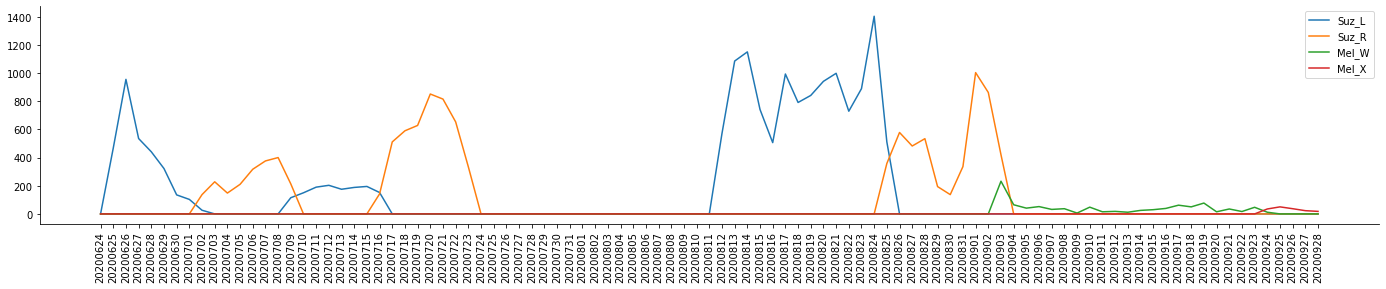

In [33]:
ax = plt.subplot()
mebiosL.plot_daterange(start='20200624', end='20200928')
mebiosR.plot_daterange(start='20200624', end='20200928')
# mebiosmelW.parse_filenames()
mebiosmelW.plot_daterange(start='20200624', end='20200928')
# mebiosmelX.parse_filenames()
mebiosmelX.plot_daterange(start='20200624', end='20200928')
# plt.axis('off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.legend(['Suz_L','Suz_R','Mel_W','Mel_X'])